In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
#Filter Results
grouped_results = study_results.groupby("Mouse ID")
filtered_results = grouped_results.filter(lambda x: x["Timepoint"].count() == 10)
filtered_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
5,h246,0,45.000000,0
6,p189,0,45.000000,0
11,b559,0,45.000000,0
12,y260,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
#Combine the data
combined_results = filtered_results.merge(mouse_metadata, on="Mouse ID")
combined_results.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [5]:
#Group data by every timepoint per regiment
grouped_regiment = combined_results.groupby(["Drug Regimen", "Timepoint"])
grouped_regiment.count().head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites  Sex  \
Drug Regimen Timepoint                                                        
Capomulin    0                21                  21                21   21   
             5                21                  21                21   21   
             10               21                  21                21   21   
             15               21                  21                21   21   
             20               21                  21                21   21   

                        Age_months  Weight (g)  
Drug Regimen Timepoint                          
Capomulin    0                  21          21  
             5                  21          21  
             10                 21          21  
             15                 21          21  
             20                 21          21

In [6]:
#Set up a dataframe holding stats for each timepoint per regiment
tumor_med = grouped_regiment["Tumor Volume (mm3)"].median()
tumor_avg = grouped_regiment["Tumor Volume (mm3)"].mean()
tumor_sem = grouped_regiment["Tumor Volume (mm3)"].sem()
tumor_std = grouped_regiment["Tumor Volume (mm3)"].std()
tumor_var = grouped_regiment["Tumor Volume (mm3)"].var()
grouped_regiment_df = pd.DataFrame({"Median":tumor_med, "Average":tumor_avg, "SEM":tumor_sem, "Stand. Dev.":tumor_std, 
                                    "Variance":tumor_var})

#Define function to create stat summary for each regimen
def regimen_stat(regimen):
    return grouped_regiment_df.loc[regimen, :]

#For loop to print all the stat sums for all the regimens
regimens = combined_results["Drug Regimen"].unique()
for regimen in regimens:
    print(regimen)
    print(regimen_stat(str(regimen)))

Capomulin
              Median    Average       SEM  Stand. Dev.   Variance
Timepoint                                                        
0          45.000000  45.000000  0.000000     0.000000   0.000000
5          45.622381  44.638812  0.373530     1.711731   2.930025
10         43.421014  43.288693  0.707142     3.240531  10.501043
15         42.283665  42.241369  0.811862     3.720418  13.841513
20         40.716428  41.046149  0.846435     3.878850  15.045480
25         40.156413  39.719733  0.895478     4.103597  16.839507
30         39.352792  38.803875  0.979400     4.488174  20.143704
35         37.967644  37.772247  1.102608     5.052785  25.530639
40         36.843898  36.958001  1.223608     5.607278  31.441568
45         37.311846  36.236114  1.223977     5.608969  31.460537
Ketapril
              Median    Average       SEM  Stand. Dev.   Variance
Timepoint                                                        
0          45.000000  45.000000  0.000000     0.000000   

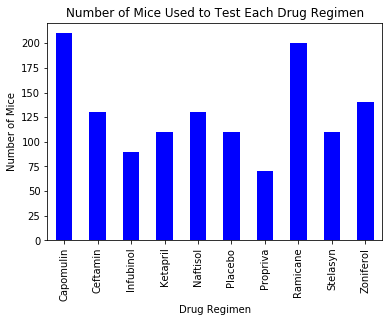

In [17]:
#Bar Plots of Data Points
regimen_groups = combined_results.groupby("Drug Regimen")

#Using Pandas
regimen_counts = regimen_groups["Mouse ID"].count()
regimen_counts.plot(kind="bar", title="Number of Mice Used to Test Each Drug Regimen", color="b")
plt.ylabel("Number of Mice")
plt.savefig("Images/pandas_barplot.png")
plt.show()